# 4. Ordinary Differential Equations

In [2]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as mtick
import scipy.integrate as scint
%matplotlib inline

## initial value problem (IVP)

**Definition [system of ordinary differential equations]**

$$\renewcommand{\R}{\mathbb{R}}$$

* explicit, first order form of ODE
  $$\frac{du(t)}{dt} = f(t,u(t))$$
    
    * function $f(t,u)$
        $$f : [0,T] \times \R^n  \rightarrow \R^n$$
        
* models how change of $u(t)$ depends on $u(t)$        
* initial value: $u(0) = u_0$
* **IVP:** *find $u(t)$ with $u(0)=u_0$ and which satisfies ODE*

## example: growth and decay

* models change in amount of some quantity $u(t)$ over time
* ode $$\frac{du}{dt} = \alpha - \beta u$$
    * $\alpha$: growth, $\beta$: decay
* stationary solution $u(t) = \alpha/\beta$
* general solution $$u(t) = e^{-\beta t} u_0 + (1-e^{-\beta t})\frac{\alpha}{\beta}$$
  
## plot of exact solution

In [2]:
T = 1.0
t = np.linspace(0,T,129)
u = lambda t, u0, T=T, alpha=1.0, beta = 4.0 : \
   np.exp(-beta*t)*u0 + (1-np.exp(-beta*t))*alpha/beta

----------------------------------

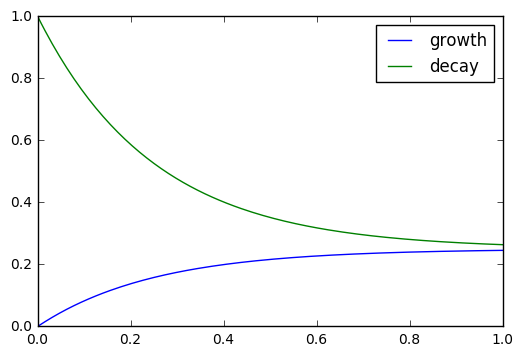

In [3]:
plt.plot(t,u(t,u0=0),label='growth')
plt.plot(t,u(t,u0=1),label='decay'); 
plt.legend();

## solving with scipy

In [4]:
f = lambda t, u, alpha=1.0, beta=4.0 : alpha - beta*u
solver = scint.ode(f)
u0 = 1.0
solver.set_initial_value(u0,0.0)
unum = [u0,]
for tk in t[1:]:
    #print(tk)
    unum.append(solver.integrate(tk)[0])

In [3]:
help(scint.ode)

Help on class ode in module scipy.integrate._ode:

class ode(builtins.object)
 |  ode(f, jac=None)
 |  
 |  A generic interface class to numeric integrators.
 |  
 |  Solve an equation system :math:`y'(t) = f(t,y)` with (optional) ``jac = df/dy``.
 |  
 |  *Note*: The first two arguments of ``f(t, y, ...)`` are in the
 |  opposite order of the arguments in the system definition function used
 |  by `scipy.integrate.odeint`.
 |  
 |  Parameters
 |  ----------
 |  f : callable ``f(t, y, *f_args)``
 |      Right-hand side of the differential equation. t is a scalar,
 |      ``y.shape == (n,)``.
 |      ``f_args`` is set by calling ``set_f_params(*args)``.
 |      `f` should return a scalar, array or list (not a tuple).
 |  jac : callable ``jac(t, y, *jac_args)``, optional
 |      Jacobian of the right-hand side, ``jac[i,j] = d f[i] / d y[j]``.
 |      ``jac_args`` is set by calling ``set_jac_params(*args)``.
 |  
 |  Attributes
 |  ----------
 |  t : float
 |      Current time.
 |  y : nd

-------------------------------------

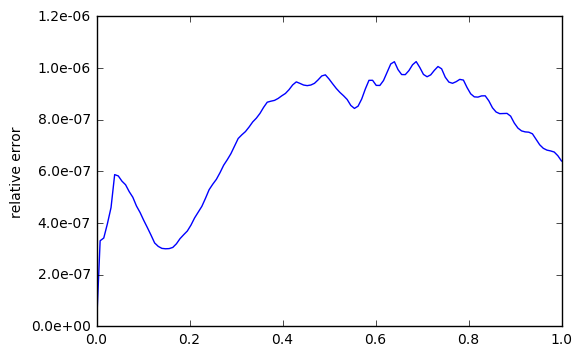

In [6]:
#plt.plot(t,np.array(unum)); 
plt.plot(t,(np.array(unum)-u(t,u0))/u(t,u0)); plt.ylabel('relative error');
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

---------------------------------

## example: mechanics

* Damped spring oscillator, Newton's 2nd law
  $$m x^{\prime\prime} = -m\beta {x^\prime} - \gamma x $$

* first order system $u_1 = x$ and $u_2 = x^\prime$
  $$\frac{du}{dt} = f(u)$$
  where 
  $$
  f = \begin{bmatrix} u_2 \\ -(\beta u_2 + \gamma u_1/m)
  \end{bmatrix}
  $$
  
## solving with scipy

In [7]:
f = lambda t, u, m=0.5, beta = 4, gamma = 400.0 :\
    np.array((u[1],-(beta*u[1]+gamma*u[0]/m)))
    
solver = scint.ode(f)
u0 = np.array([1.0,0.0])
solver.set_initial_value(u0,0.0)
unum = [u0,]
for tk in t[1:]:
    unum.append(solver.integrate(tk))

---------------------------------

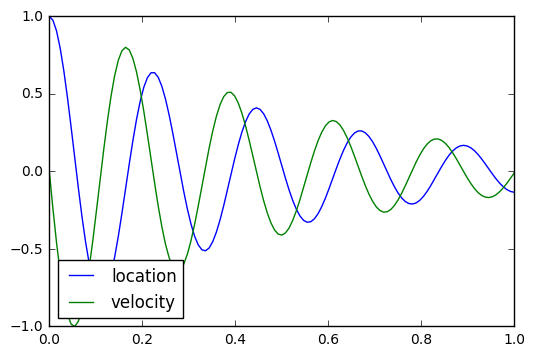

In [8]:
max_disp = np.max(abs(np.array(unum)[:,0])) 
max_vel = np.max(abs(np.array(unum)[:,1]))
plt.plot(t, np.array(unum)[:,0]/max_disp,label='location')
plt.plot(t, (np.array(unum)[:,1])/max_vel, label='velocity');plt.legend(loc=3);

 -----------------------------------------------------

## example: chemical reaction 

* burning hydrogen $2H + O \rightarrow H_2O$
* $u_1, u_2, u_3$ are concentrations of $H, O$ and $H_2O$, respectively
* system of ODEs from law of mass action
  $$\frac{du}{dt} = f(u)$$
  with
  $$f(u) = \kappa u_1^2 u_2 \begin{bmatrix} -2 \\ -1 \\ 1 \end{bmatrix}$$ 
* note that $u_1 + 2u_3$ and $u_2+u_3$ are constant (total amount of $H$ and $O$ atoms)

## solving with scipy

In [9]:
f = lambda t, u, kappa=1.0 : \
  kappa*u[0]**2*u[1]*np.array((-2.0,-1.0,1.0))
solver = scint.ode(f)
u0 = np.array([1.0,1.0,0.0])
solver.set_initial_value(u0,0.0)
unum = [u0,]
for tk in t[1:]:
    unum.append(solver.integrate(tk))

------------------------------

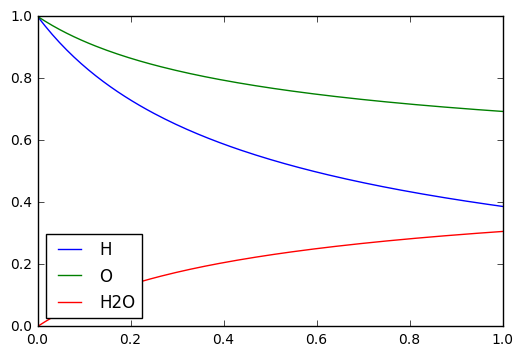

In [10]:
plt.plot(t, np.array(unum)[:,0],label='H')
plt.plot(t, np.array(unum)[:,1],label='O')
plt.plot(t, (np.array(unum)[:,2]), label='H2O');
plt.legend(loc=3);

## example: epidemiology

* SIR model (susceptibles, infectives, recovered)
* $u_1,u_2, u_3$ are number of susceptibles, infectives and recovered
* system of ODES
  $$\frac{du}{dt} = f(u)$$
  with
  $$f(u) = \begin{bmatrix} -\beta u_1 u_2 \\ \beta u_1 u_2 -\gamma u_2 \\ \gamma u_2 \end{bmatrix}$$
  
* $\beta$ fixed number of contacts per day 
* $\gamma$ fixed number of recovered people per day
* total population size $u_1 + u_2 + u_3$ constant

## solving with scipy

In [15]:
f = lambda t, u, beta=7.0,gamma=2.0 : \
  beta*u[0]*u[1]*np.array((-1.0,1.0,0.0))\
    +gamma*u[1]*np.array((0.0,-1.0,1.0))
solver = scint.ode(f)
u0 = np.array([0.9,0.1,0.0])
solver.set_initial_value(u0,0.0)
unum = [u0,]
for tk in t[1:]:
    unum.append(solver.integrate(tk))

---------------------------------

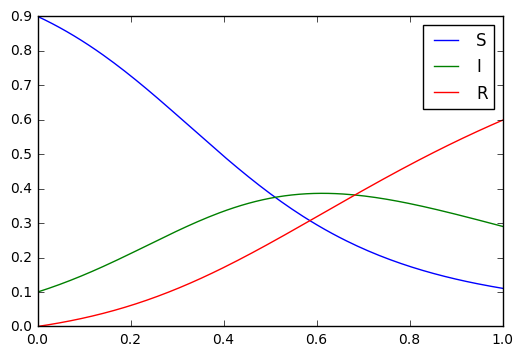

In [12]:
plt.plot(t, np.array(unum)[:,0],label='S')
plt.plot(t, np.array(unum)[:,1],label='I')
plt.plot(t, (np.array(unum)[:,2]), label='R');plt.legend(loc=1);

## example: heat

* diffusion, discretised in space
* $\lambda > 0$: diffusion coefficient, heat conductivity
* $u_k(t)$ is temperature at location $x_k=kh$ in 1D medium
* system of ODEs
  $$\frac{du}{dt} = - A u$$
  where
  $$A = \frac{\lambda}{h^2} \begin{bmatrix} 2 & -1 & & &\\-1 & 2 & -1 & & \\ 
           & \ddots & \ddots & \ddots &\\ & & -1 & 2 & -1 \\ & & & -1 & 2 \end{bmatrix}$$

## solving with scipy

In [13]:
def f(t,u,lam=0.05):
    n = u.shape[0]
    df = -2*lam*u
    df[:-1] += lam*u[1:]
    df[1:]  += lam*u[:-1]
    return df*(n-1)**2

def heat():
    n = 35
    solver = scint.ode(f)
    u0 = np.zeros(n); 
    u0[n//2] = 1.0
    print(n//2)
    solver.set_initial_value(u0,0.0)
    plt.plot(u0,label='t={:2.1e}'.format(0.0))
    for tk in (0.01,0.05,0.1):
        unum = solver.integrate(tk)
        plt.plot(unum,label='t={:2.1e}'.format(tk))
    plt.legend();

-------------------------------------------

17


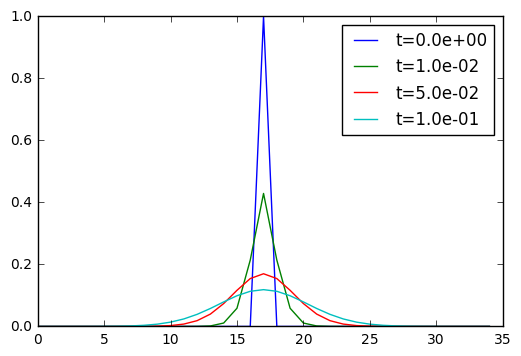

In [14]:
heat()



## autonomous form

$$\frac{du}{dt} = f(u)$$
    
* function $f : \R^n \rightarrow \R^n$
* by adding $u_0(t)=t$ with ODE $u_0^\prime=1$ and $u_0(0)=0$ reformulate more general ODE as autonomous 
    
## implicit higher order form    
    
(@ode-g) $$F(u(t),u^\prime(t),\ldots,u^{(s)}(t),t) = 0$$
    
* function $F(u_1,\ldots,u_{s+1},t)$
  $$F : \R^n\times \cdots \times \R^n \times [0,T] \rightarrow \R^n$$
        
* transform higher order implicit form to first order explicit form:
        
    * reduce to first order system by replacing $u(t)$ by vector 
      $(u_1(t),u_2(t),\ldots,u_s(t))$ where $u_k(t) = u^{(k-1)}(t)$
    * add the equations $u^\prime_k(t) - u_{k+1}(t) = 0$ to $F$
    * resulting first order implicit form with extended $F$ and $u(t)$: $$F(u(t),u^\prime(t),t)=0$$
    * solve for $u^\prime(t)$ to get explicit form

## remarks

* for most ordinary differential equations the solution is not known
* solution of ordinary differential equations is not unique
    * initial value problem: $u(0) = u_0$
    * boundary value problem: $B(u(0), u(T)) = 0$
    * solution of boundary value problem with "shooting method":
        * solve intial value problem for general initial value $u_0$ to
            get $u_T = g(u_0)$ for some function $g$
        * then solve the boundary equations for $u_0$
            $$B(u_0, g(u_0)) = 0$$
    * here we only consider the initial value problem

## linear systems of ODEs

* important class of ODEs with known solution: linear ODEs where $f(t,u) = Au$

 $$\frac{du}{dt} = Au$$
    * solution of the initial value problem
      $$u(t) = \exp(At) u_0$$
        
## reformulate IVP as integral equation

* integrate the explicit form to get

    (@inteq) $$u(t) = u_0 + \int_0^t f(s,u(s))\, ds, \quad t\in[0,T]$$
* this is a **Volterra integral equation of the 2nd kind**
* why reformulate?
    * allows application of functional analysis to show existence and uniqueness of solution
    * starting point for development and theory of numerical techniques using quadrature methods

## theory

* existence, uniqueness, stability and bounds on solutions, properties like positivity, 
   symmetry and conserved quantities
* these theoretical aspects are important for numerical solution
* theory uses computational concepts

**Reference** (advanced)

Gerald Teschl, *Ordinary Differential Equations and Dynamical Systems*, Amer. Math. Soc 2011

see your own lecture notes from ODE course

## existence and uniqueness theorem

**Theorem** Picard-Lindelof theorem

If

* $f(t,u)$ is continuous in a neighborhood of $(t_0,u_0)$
* $f(t,\cdot)$ is Lipschitz continuous with Lipschitz constant $L$ which is independent of $t$, 
then there exists a unique continuous $u(t)$ which satisfies the initial value problem for $t\in [t_0, t_0+1/L]$


## mathematical algorithm: Picard iteration

* aim: compute solution of ODE in $[t,t+h]$ where $h \leq 1/L$ (Lipschitz constant)
* integral operator:
$$F_h(u)(t) = u_0 + \int_{t_0}^{t} f(s,u(s))\, ds, \quad t\in [t_0,t_0+h]$$

* initialise: $u^0 = u_0$
* iterate: $u^{k+1} = F_h(u^k)$ for $k=0,1,2,\ldots$ until convergence

## comments

* proof of theorem by Picard iteration and fixed point theorem
* in practical algorithms, $F_h(u)$ is approximated 
* theorem shows the way how to design numerical algorithms: compute $u(t)$ for $t\in[t,t+h]$ from
  $$u(t) = u_0 + \int_{t_0}^t f(s,u(s))\, ds, \quad t\in[t_0,t_0+h]$$
  
    * obtain approximation by approximating the integral using quadrature methods